# Breast Cancer Prediction Algorithm

Table of Contents:

1.Business Problem
2.Importing the Dataset
3.Exploratory Data Analysis (EDA)
3.1 Data Overview
3.2 Data Cleaning/ Data wrangling (Deleting Duplicate Lines, Dropping irrelevant columns etc.)
4.Data Visualization
5.Model Preparation
5.1 Splitting the dataset into Train and Test Sets
6.Machine Learning Models 
6.1 Logistic Regression
6.2 Decision Tree
6.3 Random Forest Classifier
7.Summary


1. Business Problem
Finding breast cancer early and getting state-of-the-art cancer treatment are two of the most important strategies for preventing deaths from breast cancer. Breast cancer that’s found early, when it’s small and has not spread, is easier to treat successfully. In this work we will apply a breast cancer classification with Logistic Regression algorithm, DT Algorithm and Random Forest Algorithm.

Dataset Information:
The dataset contains 569 rows and 32 columns of tumor shape and specifications. The tumor is classified as benign or malignant based on its geometry and shape. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, which is type of biopsy procedure. They describe characteristics of the cell nuclei present in the image.

The features of the dataset include:

1.tumor radius (mean of distances from center to points on the perimeter)
2.texture (standard deviation of gray-scale values)
3.perimeter
4.area
5.smoothness (local variation in radius lengths)
6.compactness (perimeter² / area — 1.0)
7.concavity (severity of concave portions of the contour)
8.concave points (number of concave portions of the contour)
9.symmetry
10.fractal dimension

In [47]:
import numpy as np # Provides multidimensional array object as well as matrices.
import pandas as pd # data processing, CSV file I/O

2.Importing the dataset

In [48]:
#Data Collection
data = pd.read_csv("dataset.csv")

In [49]:
# loading the data to a data frame
data.shape

(569, 32)

In [50]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


3.Exploratory Data Analysis (EDA)

In [51]:
#To view concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [52]:
#Identifying object features
data.describe(include="O")

,diagnosis
count,569
unique,2
top,B
freq,357


In [53]:
#Finding unique values in categorical data
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [54]:
# Dropping id column as it is of no use
data = data.drop('id', axis = 1)

In [55]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [56]:
#Separating benign and malignant patients.
benign     = data[data["diagnosis"] == "B"]
malignant = data[data["diagnosis"] == "M"]

#Assigning numercial values to catagorical target column.
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})


In [57]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [58]:
# Deleting Duplicate Lines and keeping last record
data = data.drop_duplicates(keep='last')
#Checking number of rows
data.shape[0]

569

In [59]:
import matplotlib.pyplot as plt # for visualizing the data
import seaborn as sns # library used for making statistical graphs
import plotly.express as px #  functions that can create entire figures at once,
import plotly.graph_objects as go # Python classes that represent parts of a figure.
%matplotlib inline #enables the drawing of matplotlib figures
sns.set_style('darkgrid')

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

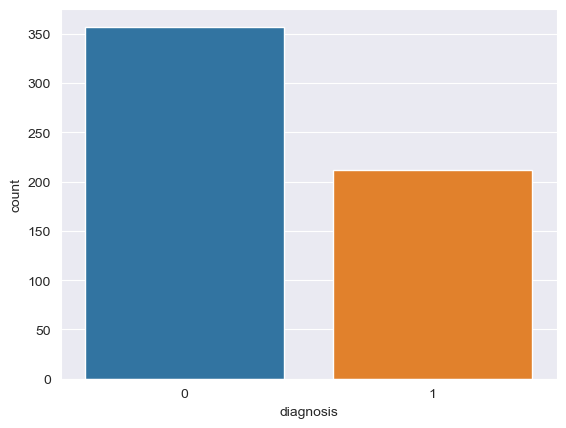

In [60]:
sns.countplot(x='diagnosis', data=data) #It counts the number of observations per category for a categorical variable, and displays the results as a bar chart

In [85]:
data.iloc[:,0:12].corr()# With iloc () function, we can retrieve a particular value belonging to a row and column using the index values assigned to it.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925
points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379


<AxesSubplot:>

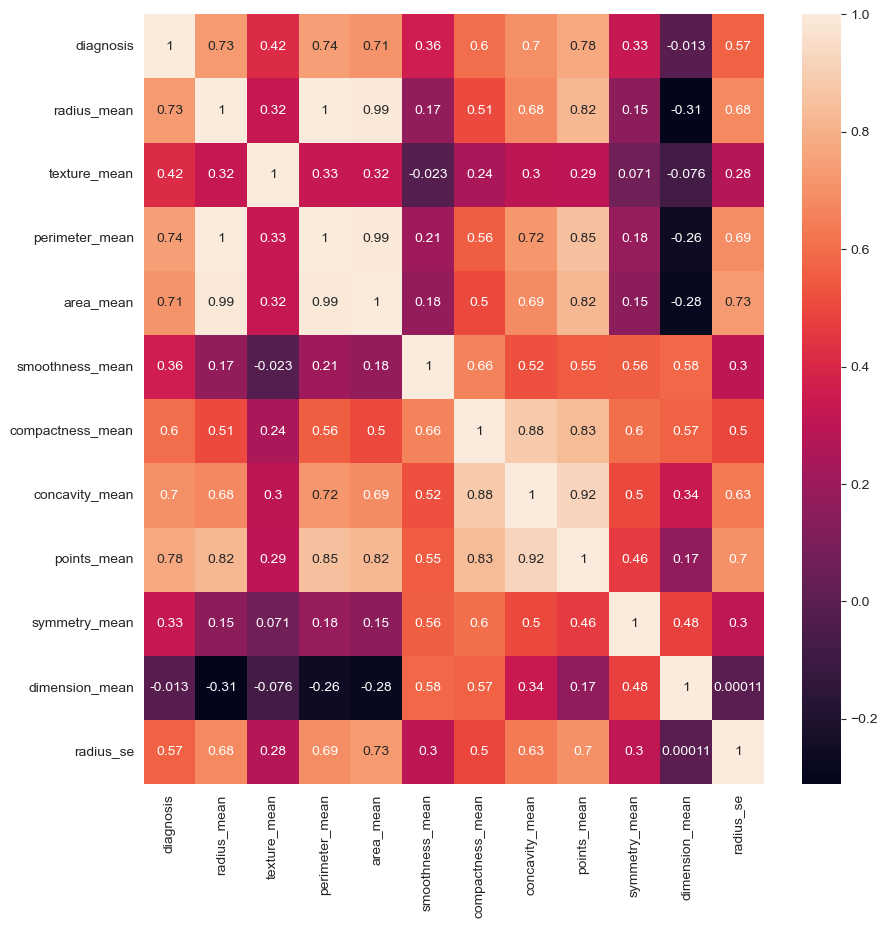

In [87]:
#Visualizing corrrealtion 
plt.figure(figsize=(10,10))
sns.heatmap(data.iloc[:,0:12].corr(),annot=True)

In [66]:
y = data['diagnosis']
x = data.drop(['diagnosis'], axis = 1)

In [110]:
# Splitting the dataset into 70 % training and 30% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [111]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [112]:
def models(x_train,y_train):
   
    #Logistic Regression
     from sklearn.linear_model import LogisticRegression
     log = LogisticRegression(random_state=0)
     log.fit(x_train,y_train)
    
    #Decision Tree
     from sklearn.tree import DecisionTreeClassifier
     tree = DecisionTreeClassifier(criterion='entropy',random_state=42)
     tree.fit(x_train,y_train)
    
    #Random Forest Classifier
     from sklearn.ensemble import RandomForestClassifier
     forest = RandomForestClassifier(n_estimators =20,criterion='entropy',random_state=42)
     forest.fit(x_train,y_train)
    
    #Print the model accuracy on the training data
     print('[1]Logistic Regression Training Accuracy:',log.score(x_train,y_train))
     print('[2]Decision Tree Training Accuracy:',tree.score(x_train,y_train))
     print('[3]Random Forest Classifier Training Accuracy:',forest.score(x_train,y_train))
    
     return log, tree, forest

    
    

In [113]:
#Getting all the models
model = models(x_train,y_train)

[1]Logistic Regression Training Accuracy: 0.9874371859296482
[2]Decision Tree Training Accuracy: 1.0
[3]Random Forest Classifier Training Accuracy: 0.9974874371859297


In [114]:
#testing the model accuracy on test data
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm=confusion_matrix(y_test,model[i].predict(x_test))

    TP=cm[0][0]
    TN=cm[1][1]
    FN=cm[1][0]
    FP=cm[0][1]

    print(cm)
    print('Testing Accuracy =',(TP+TN)/(TP+TN+FN+FP))

[[109   1]
 [  1  60]]
Testing Accuracy = 0.9883040935672515
[[108   2]
 [  3  58]]
Testing Accuracy = 0.9707602339181286
[[108   2]
 [  2  59]]
Testing Accuracy = 0.9766081871345029


## Summary